In [1]:
! git clone https://github.com/DS3001/project_chd/

Cloning into 'project_chd'...
remote: Enumerating objects: 16, done.
remote: Counting objects: 100% (10/10), done.
remote: Compressing objects: 100% (6/6), done.
remote: Total 16 (delta 6), reused 6 (delta 4), pack-reused 6
Receiving objects: 100% (16/16), 754.81 KiB | 8.48 MiB/s, done.
Resolving deltas: 100% (6/6), done.


In [2]:
# import the testing data:

import pandas as pd
df2 = pd.read_csv('/content/project_chd/fhs_test.csv')

In [3]:
df2.head()

,Unnamed: 0,sex,age,education,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
0,674,0,58,1.0,1,20.0,0.0,0,0,0,NaN,126.0,77.0,30.08,78.0,NaN,0
1,4070,0,51,3.0,0,0.0,0.0,0,0,0,264.0,135.0,83.0,26.68,60.0,74.0,0
2,3150,0,44,2.0,1,9.0,0.0,0,1,0,NaN,147.5,96.0,30.57,78.0,NaN,1
3,1695,0,40,2.0,1,20.0,0.0,0,0,0,271.0,138.5,88.0,27.24,80.0,NaN,1
4,2692,1,58,2.0,1,20.0,0.0,0,0,0,207.0,110.0,80.0,23.55,78.0,78.0,0


In [5]:
df2.columns.unique()

# since we only used prevalentStroke, prevalentHyp, diabetes and TenYearCHD for the training data, that is what I will clean for the testing as well

Index(['Unnamed: 0', 'sex', 'age', 'education', 'currentSmoker', 'cigsPerDay',
       'BPMeds', 'prevalentStroke', 'prevalentHyp', 'diabetes', 'totChol',
       'sysBP', 'diaBP', 'BMI', 'heartRate', 'glucose', 'TenYearCHD'],
      dtype='object')

In [6]:
df2['prevalentStroke'].value_counts()

prevalentStroke
0    1056
1       4
Name: count, dtype: int64

In [7]:
df2['prevalentStroke'].unique()

array([0, 1])

In [9]:
df2['prevalentHyp'].value_counts()

prevalentHyp
0    764
1    296
Name: count, dtype: int64

In [8]:
df2['prevalentHyp'].unique()

array([0, 1])

In [10]:
df2['diabetes'].value_counts()

diabetes
0    1034
1      26
Name: count, dtype: int64

In [11]:
df2['diabetes'].unique()

array([0, 1])

In [12]:
df2['TenYearCHD'].value_counts()

TenYearCHD
0    903
1    157
Name: count, dtype: int64

In [14]:
df2['TenYearCHD'].unique()

array([0, 1])

In [15]:
df2.dropna(inplace = True) # data is clear, just handle the NAs

In [21]:
# now run our model but for the testing data

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Maxmin normalization function:
def maxmin(z):
    z = (z-min(z))/(max(z)-min(z))
    return(z)

# Apply maxmin to each column of X to get U:
X = X.apply(maxmin)
print(X.head())
print(X.describe())

   diabetes  prevalentHyp
1       0.0           0.0
4       0.0           0.0
5       0.0           1.0
6       0.0           0.0
7       0.0           0.0
         diabetes  prevalentHyp
count  914.000000    914.000000
mean     0.025164      0.278993
std      0.156709      0.448750
min      0.000000      0.000000
25%      0.000000      0.000000
50%      0.000000      0.000000
75%      0.000000      1.000000
max      1.000000      1.000000


In [20]:
from sklearn.neighbors import KNeighborsClassifier

# Select features/target variable for analysis:
y = df2['TenYearCHD']
X = df2.loc[:,['diabetes','prevalentHyp']] # Create feature matrix

# Max-min normalize the features:
X = X.apply(maxmin)

# Fit the model:
model = KNeighborsClassifier(n_neighbors=3) # Create a sk model for k=3
classifier_model = model.fit(X,y) # Train the model on our data


In [ ]:
# confusion matrixes

In [23]:

from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split

# Select data:

y = df2['TenYearCHD'] # Target variable
X = df2.loc[:,['diabetes','prevalentHyp']] # Create feature matrix
X = X.apply(maxmin) # Normalize X

In [24]:
# Split the sample:

X_train, X_test, y_train, y_test = train_test_split(X,y, # Feature and target variables
                                                    test_size=.5, # Split the sample 80 train/ 20 test
                                                    random_state=200) # For replication purposes
N_train = len(y_train)
N_test = len(y_test)

In [25]:
# Solve for k that maximizes accuracy:

k_bar = 100 # Number of k's to try
Acc = np.zeros(k_bar) # We'll store the accuracy here

for k in range(k_bar):
    model = KNeighborsClassifier(n_neighbors=k+1) # Create a sk model for k
    fitted_model = model.fit(X_train.values,y_train) # Train the model on our data
    y_hat = fitted_model.predict(X_test.values) # Predict values for test set
    Acc[k] = np.sum( y_hat == y_test )/N_test # Accuracy on testing data

Acc_max = np.max(Acc) # Find highest recorded Accuracy
max_index = np.where(Acc==Acc_max) # Find the indices that equal the maximum
k_star = max_index[0]+1 # Find the optimal value of k; why index+1?
print(k_star)

[  1   2   3   4   5   6   7   8   9  10  11  12  13  14  15  16  17  18
  19  20  21  22  23  24  25  26  27  28  29  30  31  32  33  34  35  36
  37  38  39  40  41  42  43  44  45  46  47  48  49  50  51  52  53  54
  55  56  57  58  59  60  61  62  63  64  65  66  67  68  69  70  71  72
  73  74  75  76  77  78  79  80  81  82  83  84  85  86  87  88  89  90
  91  92  93  94  95  96  97  98  99 100]


In [26]:

# Fit optimal model:
model = KNeighborsClassifier(n_neighbors=k_star[0]) # Create a sk model for k
fitted_model = model.fit(X_train.values,y_train) # Train the model on our data
y_hat = fitted_model.predict(X_test.values) # Predict values for test set


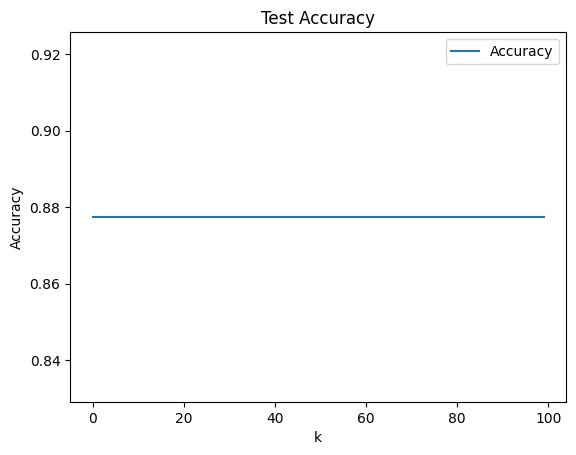

In [27]:
# Accuracy plot:
plt.plot(np.arange(0,k_bar),Acc,label='Accuracy')
plt.xlabel("k")
plt.ylabel("Accuracy")
plt.legend(loc='upper right')
plt.title('Test Accuracy')
plt.show()

In [ ]:
# accuracy is about 0.88 for the testing data which is very similar to the ~.84 for the training data.

In [29]:
# Confusion matrix:
pd.crosstab(y_test,y_hat)

col_0,0
TenYearCHD,
0,401
1,56
